In [2]:
# Based on https://www.tensorflow.org/tutorials/keras/classification

#Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar 
#quão precisamente nossa rede aprendeu a classificar as imagens.

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

2.6.0


In [3]:
#Carregando a base de dados que retorna quatro NumPy arrays

#Os arrays train_images e train_labels são o conjunto de treinamento— os dados do modelo usados para aprender.

#O modelo é testado com o conjunto de teste, os arrays test_images e test_labels.

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
#As imagens são arrays NumPy de 28x28, com os valores de pixels entre 0 to 255. As labels (alvo da classificação) são um array 
#de inteiros, no intervalo de 0 a 9 e corresponde com a classe de roupa que cada imagem representa.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels.

train_images.shape

(60000, 28, 28)

In [6]:
#Do mesmo modo, existem 60000 labels no conjunto de treinamento.

len(train_labels)

60000

In [7]:
#Cada label é um inteiro entre 0 e 9

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
#Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels

test_images.shape

(10000, 28, 28)

In [9]:
#E um conjunto de teste contendo 10000 labels das imagens

len(test_labels)

10000

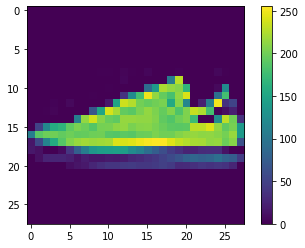

In [12]:
#Os dados precisam ser pré-processados antes de treinar a rede. 
#Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255

plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural.
#Para fazer isso, dividimos os valores por 255.

train_images = train_images / 255.0

test_images = test_images / 255.0

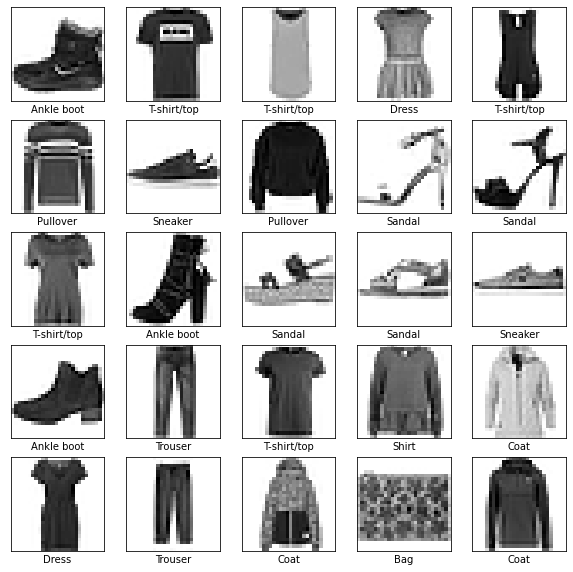

In [15]:
#Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede,
#vamos mostrar as primeiras 25 imagens do conjunto de treinamento e mostrar o nome das classes de cada imagem abaixo

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
#Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
#Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais.
#Essas serão adicionadas no passo de compilação

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
#Para começar a treinar, chamamos o método model.fit, pois ele "encaixa" o modelo no conjunto de treinamento.

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4969 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2586 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [19]:
#Comparamos como o modelo performou com o conjunto de teste

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3334 - accuracy: 0.8877

Test accuracy: 0.8877000212669373


In [20]:
#Com o modelo treinado, o usaremos para predições de algumas imagens.

predictions = model.predict(test_images)

In [21]:
#Aqui, o modelo previu que a label de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

predictions[0]

array([1.6076871e-08, 6.1894538e-13, 8.2838302e-12, 2.0082571e-09,
       1.6077367e-11, 4.0838530e-04, 2.2269493e-08, 5.6836493e-03,
       5.3477095e-08, 9.9390793e-01], dtype=float32)

In [22]:
#A predição é um array de 10 números. Eles representam um a confiança do modelo que a imagem corresponde a cada um dos 
#diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança

np.argmax(predictions[0])

9

In [23]:
#Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou class_names[9].
#Examinando a label do teste, vemos que essa classificação é correta

test_labels[0]

9

In [24]:
#Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

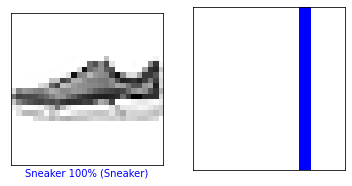

In [27]:
#Vamos olhar a previsão imagem na posição 9, do array de predição.

i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

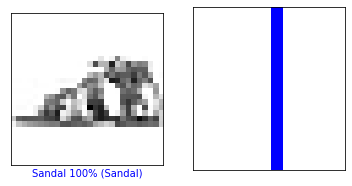

In [28]:
#Vamos olhar a previsão imagem na posição 11, do array de predição.

i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

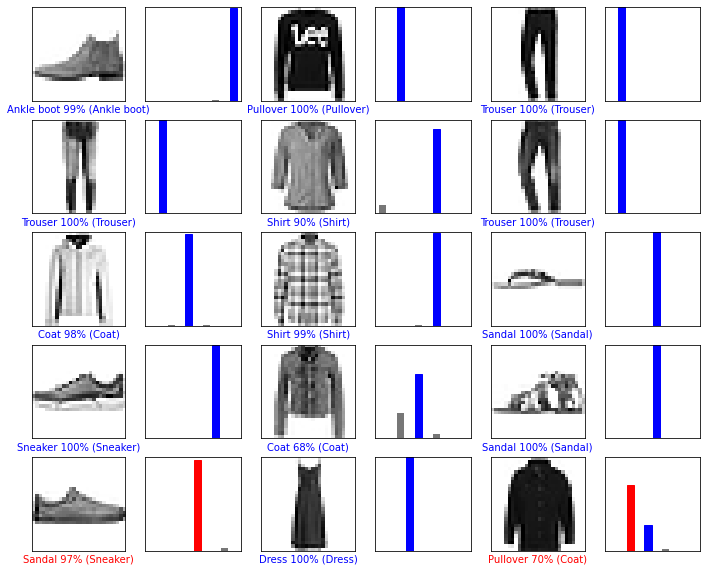

In [32]:
#Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas.

# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()